In [311]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [312]:
# import the dataset 

data = pd.read_csv('data/q2_data.csv')
data


,Unnamed: 0,X,TIME,NAME,BIKE.STANDS,AVAILABLE.BIKE.STANDS,BIKE.USAGE,hour
0,1,1,2018-08-01 12:30:02,CUSTOM HOUSE QUAY,30,0,0,2018-08-01 12:00:00
1,2,2,2018-08-01 12:30:02,THE POINT,40,12,-2,2018-08-01 12:00:00
2,3,3,2018-08-01 12:30:02,GRAND CANAL DOCK,40,1,11,2018-08-01 12:00:00
3,4,4,2018-08-01 12:35:02,CUSTOM HOUSE QUAY,30,0,-9,2018-08-01 12:00:00
4,5,5,2018-08-01 12:35:02,THE POINT,40,12,-2,2018-08-01 12:00:00
...,...,...,...,...,...,...,...,...
1029485,1029486,1029486,2022-01-01 23:50:02,THE POINT,40,11,27,2022-01-01 23:00:00
1029486,1029487,1029487,2022-01-01 23:50:02,GRAND CANAL DOCK,40,3,8,2022-01-01 23:00:00
1029487,1029488,1029488,2022-01-01 23:55:02,CUSTOM HOUSE QUAY,30,28,-35,2022-01-01 23:00:00
1029488,1029489,1029489,2022-01-01 23:55:02,THE POINT,40,11,27,2022-01-01 23:00:00


In [313]:
# Convert the 'TIME' column to a datetime data type
data['TIME'] = pd.to_datetime(data['TIME'])

# Group the data by half-hour intervals based on the 'TIME' and 'NAME' columns
data = data.groupby([pd.Grouper(key='TIME', freq='60min'), 'NAME']).mean()

# Reset the index to turn the group keys into columns
data = data.reset_index()

data




,TIME,NAME,Unnamed: 0,X,BIKE.STANDS,AVAILABLE.BIKE.STANDS,BIKE.USAGE
0,2018-08-01 12:00:00,CUSTOM HOUSE QUAY,8.5,8.5,30.0,0.333333,-7.833333
1,2018-08-01 12:00:00,GRAND CANAL DOCK,10.5,10.5,40.0,1.000000,11.166667
2,2018-08-01 12:00:00,THE POINT,9.5,9.5,40.0,12.166667,-1.833333
3,2018-08-01 13:00:00,CUSTOM HOUSE QUAY,35.5,35.5,30.0,0.250000,-9.583333
4,2018-08-01 13:00:00,GRAND CANAL DOCK,37.5,37.5,40.0,0.583333,9.083333
...,...,...,...,...,...,...,...
68459,2022-01-01 22:00:00,GRAND CANAL DOCK,1029437.5,1029437.5,40.0,2.666667,8.750000
68460,2022-01-01 22:00:00,THE POINT,1029436.5,1029436.5,40.0,11.416667,25.583333
68461,2022-01-01 23:00:00,CUSTOM HOUSE QUAY,1029471.5,1029471.5,30.0,28.000000,-35.166667
68462,2022-01-01 23:00:00,GRAND CANAL DOCK,1029473.5,1029473.5,40.0,2.833333,8.083333


In [314]:
# Convert the TIME column to datetime format
data['TIME'] = pd.to_datetime(data['TIME'])

# Extract Year, Month, Day, Hour, and Day of the Week
data['YEAR'] = data['TIME'].dt.year
data['MONTH'] = data['TIME'].dt.month
data['DAY'] = data['TIME'].dt.day
data['HOUR'] = data['TIME'].dt.hour
data['DAY_OF_WEEK'] = data['TIME'].dt.dayofweek

# 1 if the corresponding day of the week (Monday-Friday) is less than 5 (i.e., Monday to Friday)
# 0 if it is 5 or 6 (i.e., Saturday or Sunday).
data['WORKING_DAY'] = data['DAY_OF_WEEK'].apply(lambda x: 1 if x < 5 else 0)


data

,TIME,NAME,Unnamed: 0,X,BIKE.STANDS,AVAILABLE.BIKE.STANDS,BIKE.USAGE,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,WORKING_DAY
0,2018-08-01 12:00:00,CUSTOM HOUSE QUAY,8.5,8.5,30.0,0.333333,-7.833333,2018,8,1,12,2,1
1,2018-08-01 12:00:00,GRAND CANAL DOCK,10.5,10.5,40.0,1.000000,11.166667,2018,8,1,12,2,1
2,2018-08-01 12:00:00,THE POINT,9.5,9.5,40.0,12.166667,-1.833333,2018,8,1,12,2,1
3,2018-08-01 13:00:00,CUSTOM HOUSE QUAY,35.5,35.5,30.0,0.250000,-9.583333,2018,8,1,13,2,1
4,2018-08-01 13:00:00,GRAND CANAL DOCK,37.5,37.5,40.0,0.583333,9.083333,2018,8,1,13,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68459,2022-01-01 22:00:00,GRAND CANAL DOCK,1029437.5,1029437.5,40.0,2.666667,8.750000,2022,1,1,22,5,0
68460,2022-01-01 22:00:00,THE POINT,1029436.5,1029436.5,40.0,11.416667,25.583333,2022,1,1,22,5,0
68461,2022-01-01 23:00:00,CUSTOM HOUSE QUAY,1029471.5,1029471.5,30.0,28.000000,-35.166667,2022,1,1,23,5,0
68462,2022-01-01 23:00:00,GRAND CANAL DOCK,1029473.5,1029473.5,40.0,2.833333,8.083333,2022,1,1,23,5,0


[Text(0.5, 1.0, 'Count of bikes during weekdays and weekends')]

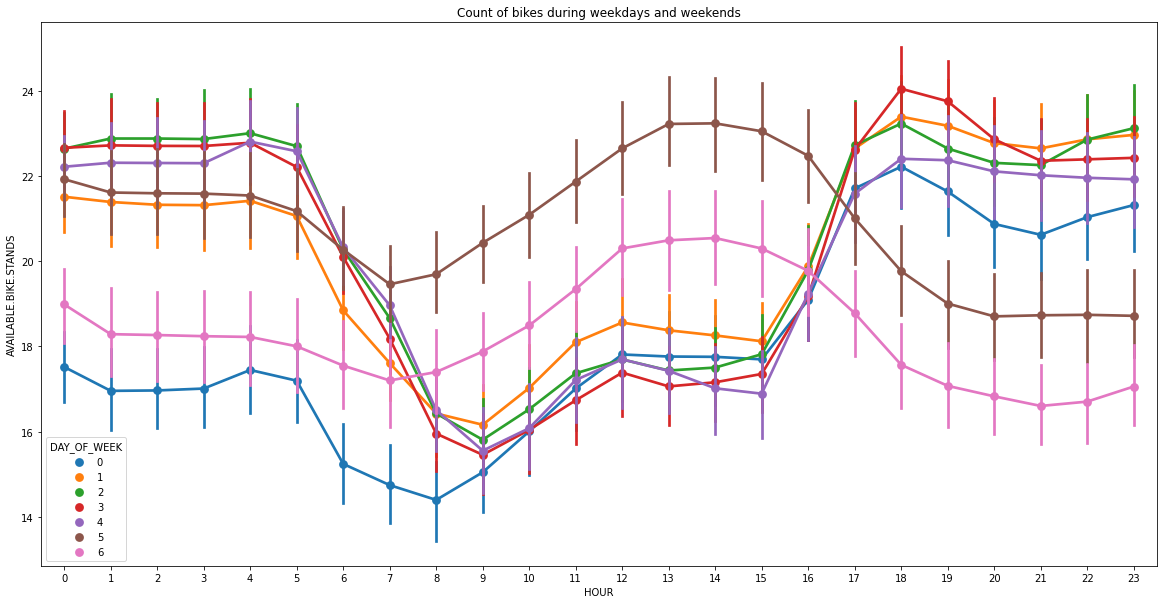

In [315]:
fig, ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=data, x='HOUR', y='AVAILABLE.BIKE.STANDS', hue='DAY_OF_WEEK', ax=ax)
ax.set(title='Count of bikes during weekdays and weekends')


[Text(0.5, 1.0, 'Count of bikes during different months')]

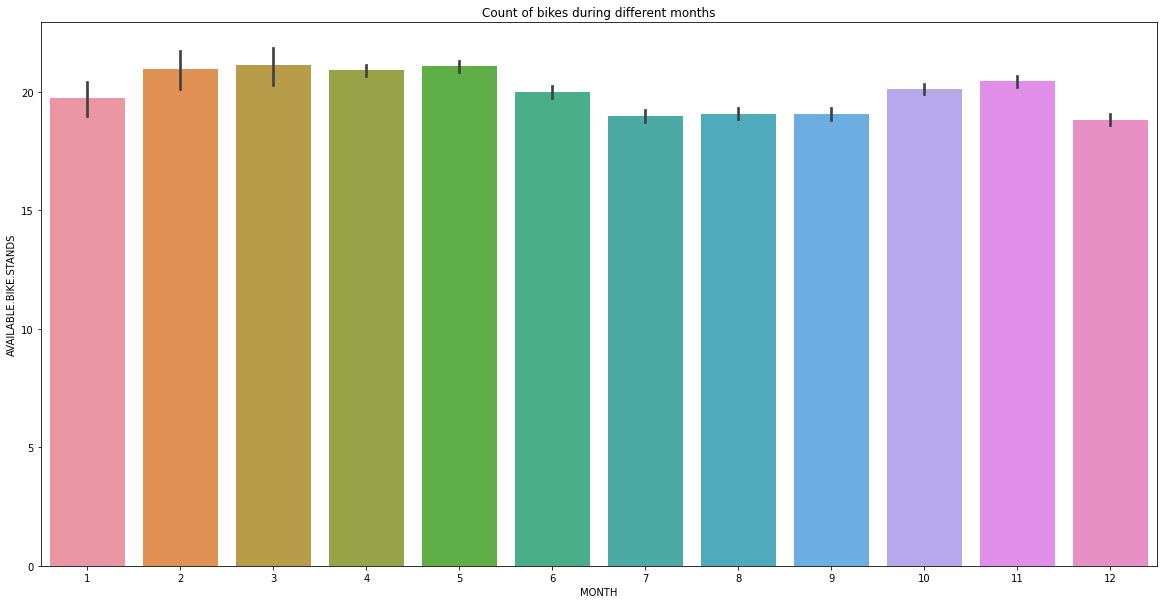

In [316]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x='MONTH', y='AVAILABLE.BIKE.STANDS', ax=ax)
ax.set(title='Count of bikes during different months')

[Text(0.5, 1.0, 'Count of bikes during different days')]

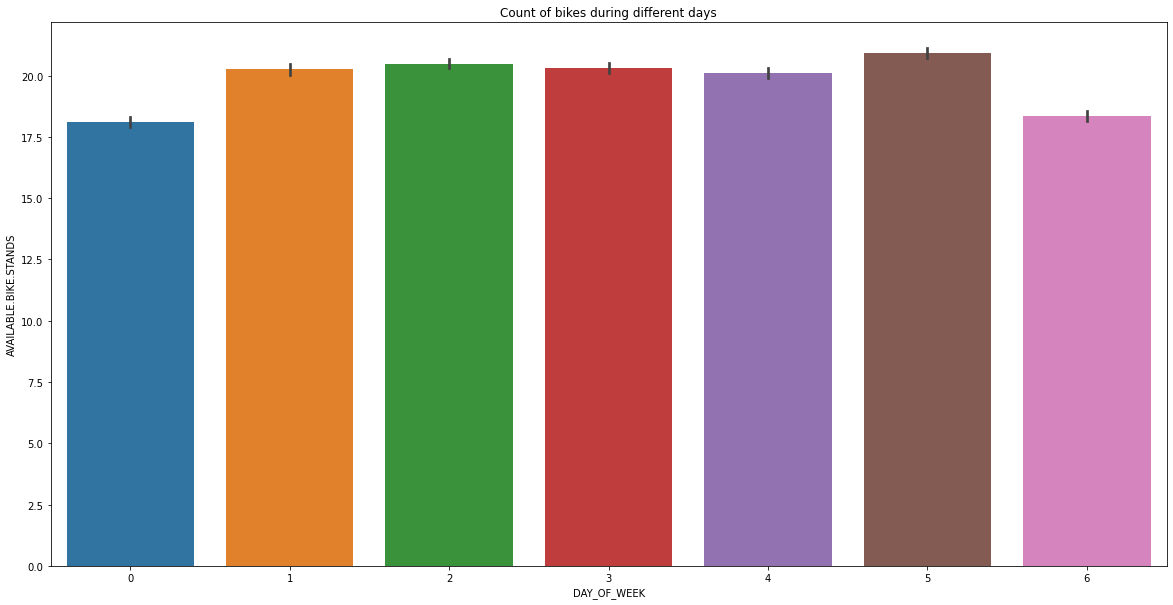

In [317]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x='DAY_OF_WEEK', y='AVAILABLE.BIKE.STANDS', ax=ax)
ax.set(title='Count of bikes during different days')

In [322]:
# Define X and y for the train and test sets
X_train = train_data.drop(['BIKE.USAGE', 'TIME', 'NAME'], axis=1)
y_train = train_data['BIKE.USAGE']

X_test = test_data.drop(['BIKE.USAGE', 'TIME', 'NAME'], axis=1)
y_test = test_data['BIKE.USAGE']

# Fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the city-bike usage for the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5225695557541017

The R-squared (R2) score is a statistical measure that represents the proportion of the variance in the dependent variable (i.e., city-bike usage) that is explained by the independent variables (i.e., time). In this case, an R2 score of 0.5225695557541017 means that approximately 52.26% of the variance in city-bike usage can be explained by time (i.e., the year). The remaining variance (47.74%) is unexplained and may be due to other factors not included in the model. A higher R2 score indicates a better fit of the model to the data, with a perfect fit having an R2 score of 1.0.

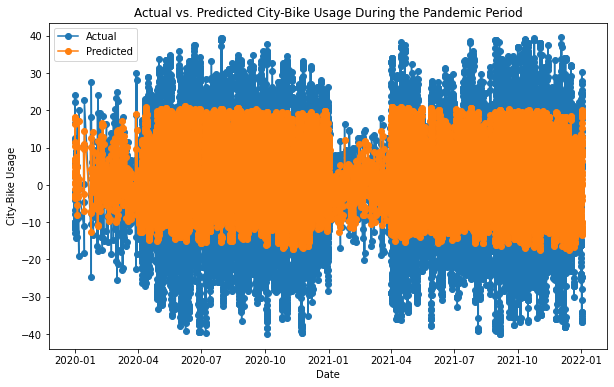

In [324]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Filter the predicted and actual data to only include the pandemic period
pandemic_data = data[data['TIME'] > '2019-12-31']

# Plot the actual city-bike usage during the pandemic period
ax.plot(pandemic_data['TIME'], pandemic_data['BIKE.USAGE'], label='Actual', marker='o')

# Plot the predicted city-bike usage during the pandemic period
ax.plot(pandemic_data['TIME'], y_pred, label='Predicted', marker='o')

# Add a title and labels for the x- and y-axis
ax.set_title('Actual vs. Predicted City-Bike Usage During the Pandemic Period')
ax.set_xlabel('Date')
ax.set_ylabel('City-Bike Usage')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [327]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse


87.26457106957228

In the context of comparing the estimated bike usage if the pandemic hadn't happened with the actual bike usage, the mean squared error (MSE) score of 87.2645 means that on average, the predicted values of bike usage are off by 87.2645 from the actual values. This indicates that the model is not perfect and there is room for improvement in predicting the bike usage without the pandemic. However, it also suggests that the model is reasonably accurate in capturing the general trend of bike usage, given that the MSE is not excessively high.

In [331]:
# Fit a DecisionTree model to the training data
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Predict the city-bike usage for the test set
y_pred = model.predict(X_test)


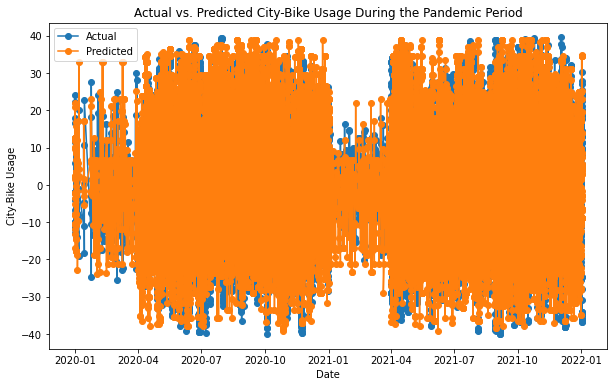

In [332]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Filter the predicted and actual data to only include the pandemic period
pandemic_data = data[data['TIME'] > '2019-12-31']

# Plot the actual city-bike usage during the pandemic period
ax.plot(pandemic_data['TIME'], pandemic_data['BIKE.USAGE'], label='Actual', marker='o')

# Plot the predicted city-bike usage during the pandemic period
ax.plot(pandemic_data['TIME'], y_pred, label='Predicted', marker='o')

# Add a title and labels for the x- and y-axis
ax.set_title('Actual vs. Predicted City-Bike Usage During the Pandemic Period')
ax.set_xlabel('Date')
ax.set_ylabel('City-Bike Usage')

# Add a legend to the plot
ax.legend()

# Display the plot
plt.show()

In [333]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


-0.0786387756161544